In [196]:
l = list()

In [197]:
l = [1,2,3,6,6,6,7,8]

In [198]:
l.count(6)

3

In [199]:
!pip install requests

In [200]:
import requests
from bs4 import BeautifulSoup

In [201]:
reviews = []
for i in range(4):
    page = requests.get("https://irecommend.ru/content/gosuslugi?page={}".format(str(i))).text
    soup = BeautifulSoup(page, "html.parser")
    cur_reviews = soup.find('ul', class_='list-comments').find_all('li')
    necessary_info = [[x.find('div', class_='authorName').text,
                      len(x.find('div', class_='starsRating').find_all('div', class_='on')),
                      x.find('div', class_="created", title="Дата публикации").text,
                      x.find('div', class_="reviewTextSnippet").text] for x in cur_reviews]
    reviews.extend(necessary_info)
reviews

[['БелкаВколесе',
  4,
  '19.07.2017',
  '\nГосуслуги - проще, чем кажется?! Дешевле уж точно! Мой опыт получения загранпаспортов на себя и на детей в самый пик сезона. Различия паспортов старого и нового образца.\n    Сайт госуслуги очень удобен. Столько всего можно сделать не выходя из дома. Подать заявление в детский сад, записаться во всевозможные инстанции на прием, записаться к врачу, оплатить налог получить информацию о штрафах ГИБДД, осуществить поиск работы проверить пенсионный счет оформить все…     '],
 ['valdolgikh',
  5,
  '08.02.2019',
  '\nЗагранпаспорт за 10 дней? Фантастика? Нет, реальность! Выдадут ли загранпаспорт гражданке с судебной задолженностью? Интрига? Неее, свершившийся факт!  Читайте, как это было.\n    Давно уже нужно было переоформить загранпаспорт, но помешала весьма веская причина - гадкая привычка откладывать всё на потом. Ну еще жуткие воспоминания об оформлении предыдущего загранпаспорта - кипы документов (там откопировать, сям заверить...), нескончае

In [202]:
len(reviews)

182

In [203]:
general_rating = sum([x[1] for x in reviews])/len(reviews)
print("Общий рейтинг сайта Госуслуги за всё время: {}".format(general_rating))

Общий рейтинг сайта Госуслуги за всё время: 4.021978021978022


In [204]:
l = [[x[2][-4:], x[2][-7:-5], x[1]] for x in reviews]
l.sort()
stars_list = []
cur_y, cur_m = l[0][0], l[0][1]
sum_, count = 0, 0
for x in l:
    if x[0] == cur_y and x[1] == cur_m:
        sum_ += x[2]
        count += 1
    else:
        stars_list.append([cur_y, cur_m, sum_ / count])
        cur_y = x[0]
        cur_m = x[1]
        sum_ = x[2]
        count = 1
stars_list.append([cur_y, cur_m, sum_ / count])

stars_list

[['2011', '11', 5.0],
 ['2012', '03', 5.0],
 ['2012', '04', 5.0],
 ['2012', '05', 5.0],
 ['2012', '07', 5.0],
 ['2012', '08', 2.0],
 ['2012', '09', 4.25],
 ['2012', '10', 4.0],
 ['2012', '11', 5.0],
 ['2012', '12', 5.0],
 ['2013', '02', 5.0],
 ['2013', '03', 3.0],
 ['2013', '04', 3.5],
 ['2013', '05', 4.5],
 ['2013', '06', 3.0],
 ['2013', '09', 5.0],
 ['2013', '11', 5.0],
 ['2013', '12', 5.0],
 ['2014', '01', 4.0],
 ['2014', '02', 4.0],
 ['2014', '04', 5.0],
 ['2014', '05', 5.0],
 ['2014', '06', 3.5],
 ['2014', '07', 4.333333333333333],
 ['2014', '09', 4.0],
 ['2014', '10', 3.6666666666666665],
 ['2014', '11', 5.0],
 ['2015', '01', 1.0],
 ['2015', '02', 4.333333333333333],
 ['2015', '03', 5.0],
 ['2015', '04', 5.0],
 ['2015', '07', 5.0],
 ['2015', '09', 5.0],
 ['2015', '12', 4.333333333333333],
 ['2016', '03', 5.0],
 ['2016', '04', 5.0],
 ['2016', '05', 1.0],
 ['2016', '06', 5.0],
 ['2016', '08', 5.0],
 ['2016', '10', 5.0],
 ['2016', '12', 4.0],
 ['2017', '01', 3.75],
 ['2017', '03', 3

In [205]:
import matplotlib.pyplot as plt

In [206]:
index = []
values = []
all_colors = ['r', 'g', 'b']
colors = []
y_color = {}
cur_y = stars_list[0][0]
cur_color_i = 0
for i, x in enumerate(stars_list):
    index.append(i+1)
    values.append(x[2])
    if x[0] != cur_y:
        y_color[cur_y] = all_colors[cur_color_i]
        cur_y = x[0]
        cur_color_i = (cur_color_i + 1) % 3
    colors.append(all_colors[cur_color_i])
y_color[cur_y] = all_colors[cur_color_i]

In [207]:
stars_list[-1]

['2021', '08', 4.333333333333333]

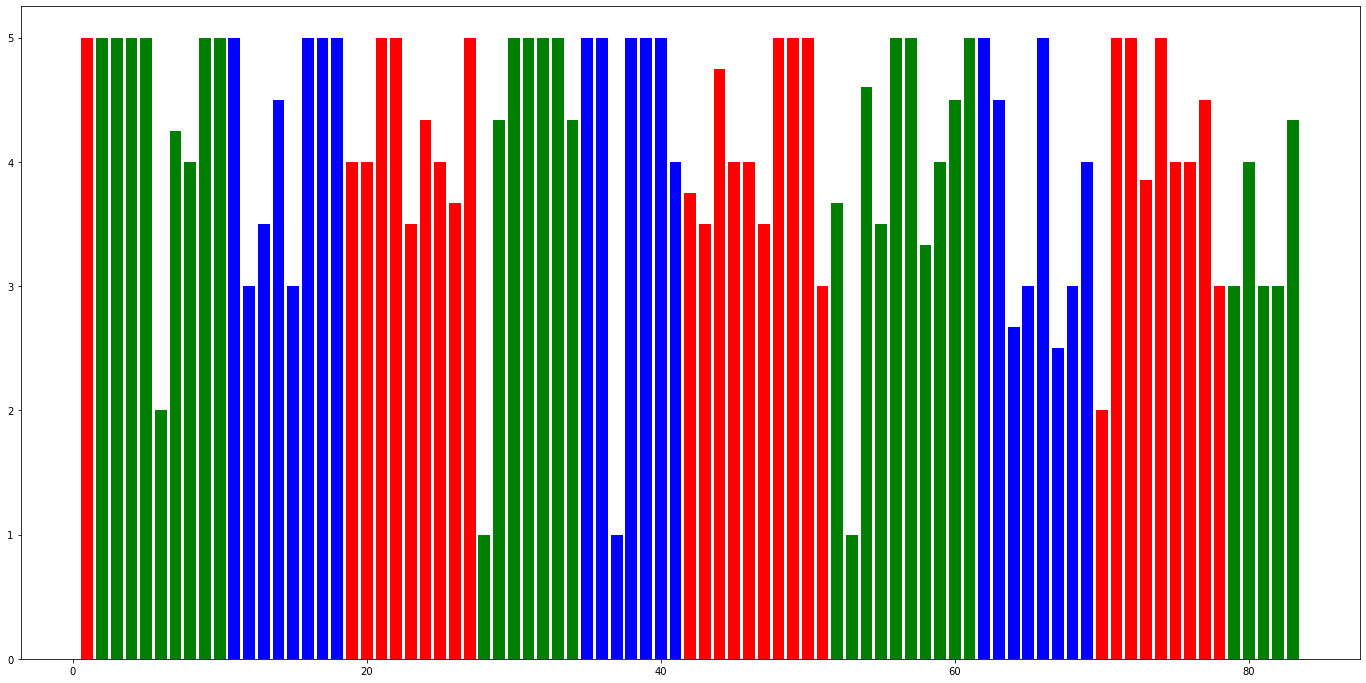

In [208]:
#Столбчатая диаграмма ср. рейтинг по месяцам 
fig, ax = plt.subplots()
fig.set_figwidth(24)
fig.set_figheight(12)
plt.bar(index,values, color=colors)
plt.show()

In [209]:
for y in y_color:
    print(y, y_color[y])

2011 r
2012 g
2013 b
2014 r
2015 g
2016 b
2017 r
2018 g
2019 b
2020 r
2021 g


In [210]:
import pandas as pd
df_full = pd.DataFrame(reviews)
df_full

,0,1,2,3
0,БелкаВколесе,4,19.07.2017,"\nГосуслуги - проще, чем кажется?! Дешевле уж ..."
1,valdolgikh,5,08.02.2019,"\nЗагранпаспорт за 10 дней? Фантастика? Нет, р..."
2,neli_rulit,4,07.08.2019,\nПолучить паспорт нового образца по месту при...
3,Joja,5,22.11.2017,\nКак сделать заграничный паспорт за 20 дней! ...
4,Yuliya,5,01.06.2020,\nЗамена российского паспорта в кратчайшие сро...
...,...,...,...,...
177,miss_Siya,5,30.09.2013,\nЗагран и внутренний паспорт очень быстро? Ре...
178,AK-80,1,08.01.2015,\nНевозможно подать документы в 1-й класс.\n ...
179,Malvinka,5,15.02.2014,"\nГосуслуги,или очень удобный сервис\n Офор..."
180,Sashka1,5,27.10.2016,\nОчень удобный сайт!\n Этим летом я вышла ...


In [211]:
df_full[2].str.split('.', expand=True)

,0,1,2
0,19,07,2017
1,08,02,2019
2,07,08,2019
3,22,11,2017
4,01,06,2020
...,...,...,...
177,30,09,2013
178,08,01,2015
179,15,02,2014
180,27,10,2016


In [212]:
df = pd.DataFrame({'authorName': df_full[0]})
df['d'] = df_full[2].str.split('.', expand=True)[0]
df['m'] = df_full[2].str.split('.', expand=True)[1]
df['y'] = df_full[2].str.split('.', expand=True)[2]
df['starsRating'] = df_full[1]
df['review'] = df_full[3]
df

,authorName,d,m,y,starsRating,review
0,БелкаВколесе,19,07,2017,4,"\nГосуслуги - проще, чем кажется?! Дешевле уж ..."
1,valdolgikh,08,02,2019,5,"\nЗагранпаспорт за 10 дней? Фантастика? Нет, р..."
2,neli_rulit,07,08,2019,4,\nПолучить паспорт нового образца по месту при...
3,Joja,22,11,2017,5,\nКак сделать заграничный паспорт за 20 дней! ...
4,Yuliya,01,06,2020,5,\nЗамена российского паспорта в кратчайшие сро...
...,...,...,...,...,...,...
177,miss_Siya,30,09,2013,5,\nЗагран и внутренний паспорт очень быстро? Ре...
178,AK-80,08,01,2015,1,\nНевозможно подать документы в 1-й класс.\n ...
179,Malvinka,15,02,2014,5,"\nГосуслуги,или очень удобный сервис\n Офор..."
180,Sashka1,27,10,2016,5,\nОчень удобный сайт!\n Этим летом я вышла ...


In [213]:
print("Общий рейтинг сайта Госуслуги за всё время: {}".format(df.mean()['starsRating']))

Общий рейтинг сайта Госуслуги за всё время: 4.021978021978022


In [214]:
list(df.groupby('y'))[1]

('2012',
            authorName   d   m     y  starsRating  \
 65          podkoikoi  17  07  2012            5   
 77            MollyMJ  03  05  2012            5   
 80            SheLove  05  12  2012            5   
 105  Виктория Юрьевна  21  08  2012            2   
 109            Valuer  27  09  2012            5   
 130             Клава  24  09  2012            3   
 138            ВЕлена  24  09  2012            5   
 141           Byryndy  28  11  2012            5   
 142   Счастливая мама  14  10  2012            4   
 154    Анна Борисовна  12  04  2012            5   
 155          Sofochka  22  03  2012            5   
 171        Наталья715  13  04  2012            5   
 172           Alex-nv  24  09  2012            4   
 
                                                 review  
 65   \nВОТ ЭТО ДА!! 15 минут в УФМС на подачу+5 мин...  
 77   \nОформление загранпаспорта через госуслуги - ...  
 80   \nПолучила загранпаспорт для себя и любимого!\...  
 105  \nПока да

In [215]:
list(df.groupby(['y', 'm']))[2]

(('2012', '04'),
          authorName   d   m     y  starsRating  \
 154  Анна Борисовна  12  04  2012            5   
 171      Наталья715  13  04  2012            5   
 
                                                 review  
 154  \nЗарегистрировала ИП не выходя из дома\n    С...  
 171  \nОчень удобно, экономит время и нервы\n    По...  )

In [216]:
list(df.groupby(['y', 'm'])['starsRating'])[2]

(('2012', '04'),
 154    5
 171    5
 Name: starsRating, dtype: int64)

In [217]:
df.groupby(['y', 'm'])['starsRating'].mean()

y     m 
2011  11    5.000000
2012  03    5.000000
      04    5.000000
      05    5.000000
      07    5.000000
              ...   
2021  01    3.000000
      03    4.000000
      04    3.000000
      07    3.000000
      08    4.333333
Name: starsRating, Length: 83, dtype: float64

In [218]:
df.groupby(['y', 'm'])['starsRating'].mean().reset_index()

,y,m,starsRating
0,2011,11,5.000000
1,2012,03,5.000000
2,2012,04,5.000000
3,2012,05,5.000000
4,2012,07,5.000000
...,...,...,...
78,2021,01,3.000000
79,2021,03,4.000000
80,2021,04,3.000000
81,2021,07,3.000000


In [219]:
def check_words(review, bad_words): #Проверка, есть ли в отзыве указанные слова
    res = False
    for word in bad_words:
        if review.lower().find(word) != -1:
            res = True
            break
    return res

In [220]:
bad_words = ['проблем','минус','ненависть','невозможно', 'ужас']

In [221]:
count = 0
for review in reviews:
    if check_words(review[3], bad_words):
        #print(review)
        count += 1
print("Общий % отзывов с негативными словами: {}".format(count/len(reviews) * 100))

Общий % отзывов с негативными словами: 11.538461538461538
